# Conexión con MySQL

In [2]:
# Primero, instalamos las bibliotecas que utilizaremos en la terminal con pip install
# Instaladas las librerías necesarias, las importamos 
import pandas as pd
from sqlalchemy import create_engine

# Conectamos a la base de datos
host ='localhost'
database='olympics'
user='root'
password='4443'

# Creamos una cadena de conexión
cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Creamos el motor de conexión
motor = create_engine(cadena_conexion)

# Creamos una lista de las tablas a cargar
nombres_tablas = ['city', 'competitor_event', 'event', 'games', 'games_city', 'games_competitor', 'medal', 'noc_region', 'person', 'person_region', 'sport']

# Usamos el método globals() y con un bucle for leemos cada tabla en un DataFrame para almacenarlo en el diccionario
for nombre in nombres_tablas:
    query = f'SELECT * FROM {nombre}'
    df_name = f'df_{nombre}'
    globals()[df_name] = pd.read_sql(query, con=motor)

# Para verificar la carga correcta, accedemos a las primeras 5 filas del DataFrame de la tabla Transactions almacenado en el diccionario
df_city.head()

,id,city_name
0,1,Barcelona
1,2,London
2,3,Antwerpen
3,4,Paris
4,5,Calgary


# Globals() 

In [3]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "# Graficamos la distribución del peso, quitando el valor 0\n\ndf_person['peso_filtrado'] = df_person['weigth'].apply(lambda x: 'NA' if x == 0 else 'x')\n\nsns.histplot(df_person['peso_filtrado'], kde=False)\nplt.xlabel('Peso')\nplt.ylabel('Distribución')\nplt.title('Histograma del peso de los competidores')\n\nplt.show()",
  "# Primero, instalamos las bibliotecas que utilizaremos en la terminal con pip install\n# Instaladas las librerías necesarias, las importamos \nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Conectamos a la base de datos\nhost ='localhost'\ndatabase='olympics'\nuser='root'\npassword='4443'\n\n# Creamos una cadena de conexión\ncadena_conexion = f'mysql+mysqlconnector://{user}

# Info() columnas y filas de un DF

In [4]:
df_competitor_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260971 entries, 0 to 260970
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   event_id       260971 non-null  int64
 1   competitor_id  260971 non-null  int64
 2   medal_id       260971 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


# Últimas 10 filas del DF

In [5]:
df_person.tail(10)

,id,full_name,gender,height,weight
128844,135562,Milan Zyka,M,173,68
128845,135563,Olesya Nikolayevna Zykina,F,171,64
128846,135564,Yevgeny Aleksandrovich Zykov,M,172,65
128847,135565,Fernando scar Zylberberg,M,168,76
128848,135566,"James Francis ""Jim"""" Zylker""",M,175,75
128849,135567,Aleksandr Viktorovich Zyuzin,M,183,72
128850,135568,Olga Igorevna Zyuzkova,F,171,69
128851,135569,Andrzej ya,M,179,89
128852,135570,Piotr ya,M,176,59
128853,135571,Tomasz Ireneusz ya,M,185,96


# Tipo de datos del DF

In [6]:
df_event.dtypes

id             int64
sport_id       int64
event_name    object
dtype: object

# Shape: Cantidad de filas y columnas

In [7]:
df_games.shape

(51, 4)

# Exploramos datos

In [8]:
df_games_competitor.head()

,id,games_id,person_id,age
0,1,1,1,24
1,2,2,2,23
2,3,3,3,24
3,4,4,4,34
4,5,5,5,21


In [9]:
df_games_competitor['age'].min()

10

In [10]:
df_games_competitor['age'].max()

97

# Gráfico 1

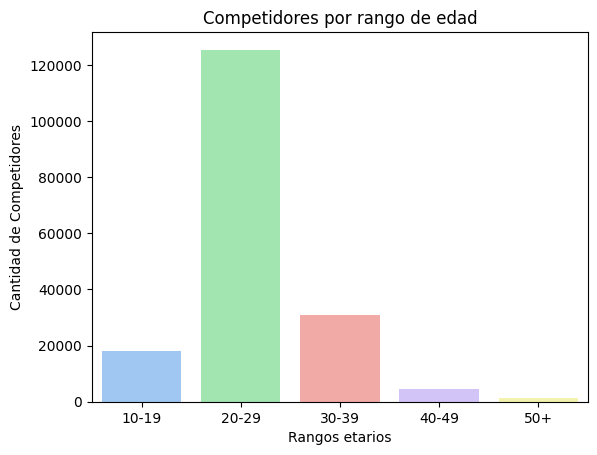

In [11]:
# Queremos graficar la cantidad de competidores por rangos de edad
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos un estilo
plt.style.use('seaborn-v0_8-pastel')

# Creamos grupos de edad
bins = [10, 20, 30, 40, 50, np.inf] #np.inf es como si fuera un límite infinito
labels = ['10-19', '20-29', '30-39', '40-49', '50+']
df_games_competitor['age_group'] = pd.cut(df_games_competitor['age'], bins=bins, labels=labels, right=False)


# Creamos el gráfico de conteo
sns.countplot(x='age_group', hue='age_group', data= df_games_competitor)

# Colocamos título y etiquetas a los ejes
plt.title('Competidores por rango de edad')
plt.xlabel('Rangos etarios')
plt.ylabel('Cantidad de Competidores')

# Mostramos el gráfico
plt.show()

# Gráfico 2

In [17]:
# Queremos graficar la distribución del peso
df_person['weight'].describe()

count    128854.000000
mean         55.733675
std          32.704643
min           0.000000
25%          49.000000
50%          66.000000
75%          77.000000
max         214.000000
Name: weight, dtype: float64

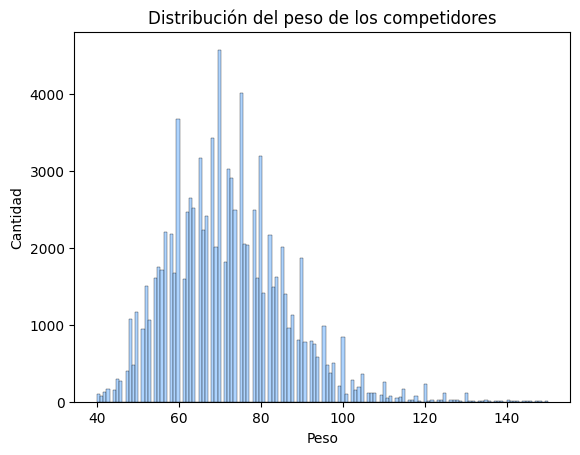

In [22]:
# Filtramos el DataFrame para que solo contenga pesos entre 40 y 200

df_filtered = df_person[(df_person['weight'] >= 40) & (df_person['weight'] <= 150)]

sns.histplot(df_filtered['weight'], kde=False)
plt.xlabel('Peso')
plt.ylabel('Cantidad')
plt.title('Distribución del peso de los competidores')

plt.show()


# Gráfico 3

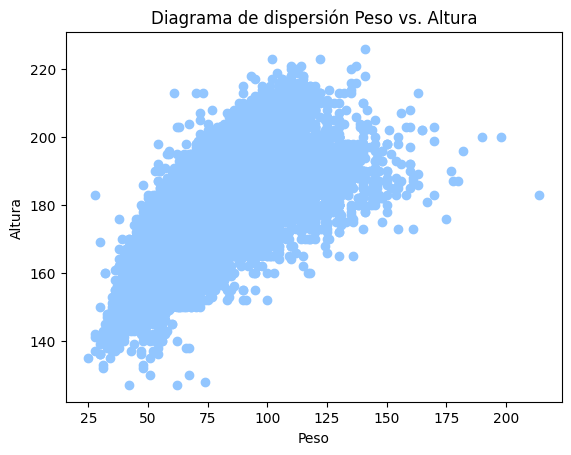

In [24]:
# Filtramos los valores 0 de los DF

df_filtered = df_person[(df_person['weight'] != 0) 
                        & (df_person['height'] !=0)]

 
plt.scatter(df_filtered['weight'], df_filtered['height'])
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Diagrama de dispersión Peso vs. Altura')
plt.show()

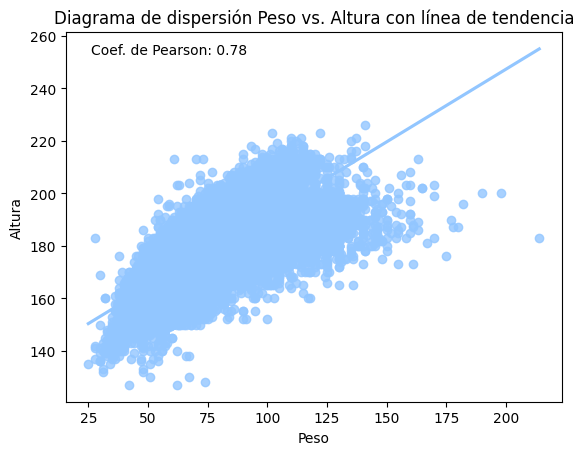

In [27]:
# si queremos añadirle una línea de tendencia y además añadirle el coeficiente de pearson podemos usar seaborn 

from scipy.stats import pearsonr

# Calculamos el coeficiente de correlación de Pearson
pearson_corr, _ = pearsonr(df_filtered['weight'], df_filtered['height'])

# Creamos el gráfico de dispersión con línea de tendencia
sns.regplot(x='weight', y='height', data=df_filtered, ci=None)

# Configuramos etiquetas y título
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Diagrama de dispersión Peso vs. Altura con línea de tendencia')

# Añadimos el coeficiente de correlación al gráfico
plt.text(0.05, 0.95, f'Coef. de Pearson: {pearson_corr:.2f}', ha='left', va='center', transform=plt.gca().transAxes)

# Mostramos el gráfico
plt.show()

# Gráfico 4

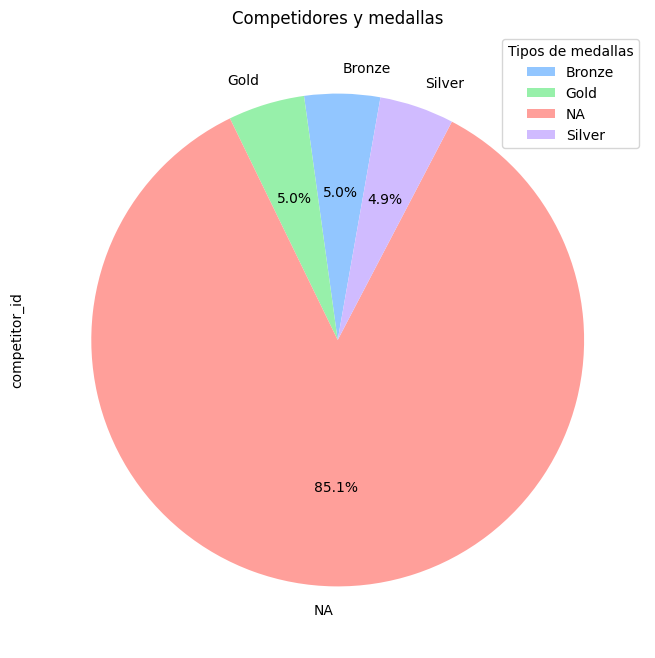

In [38]:
# Queremos graficar el porcentaje de competidores que ha ganado medallas
# Unimos los DF

datos = pd.merge(df_medal, df_competitor_event, how='inner', left_on='id', right_on='medal_id')

# Ejemplo con un Pie
competidores_medalla = datos.groupby('medal_name')['competitor_id'].count()

# Creamos gráfico de pastel
plt.figure(figsize=(14, 8))
competidores_medalla.plot(kind='pie', autopct='%1.1f%%', startangle=80)
 
plt.title('Competidores y medallas')
plt.legend(title='Tipos de medallas')
plt.show()

# Gráfico 5

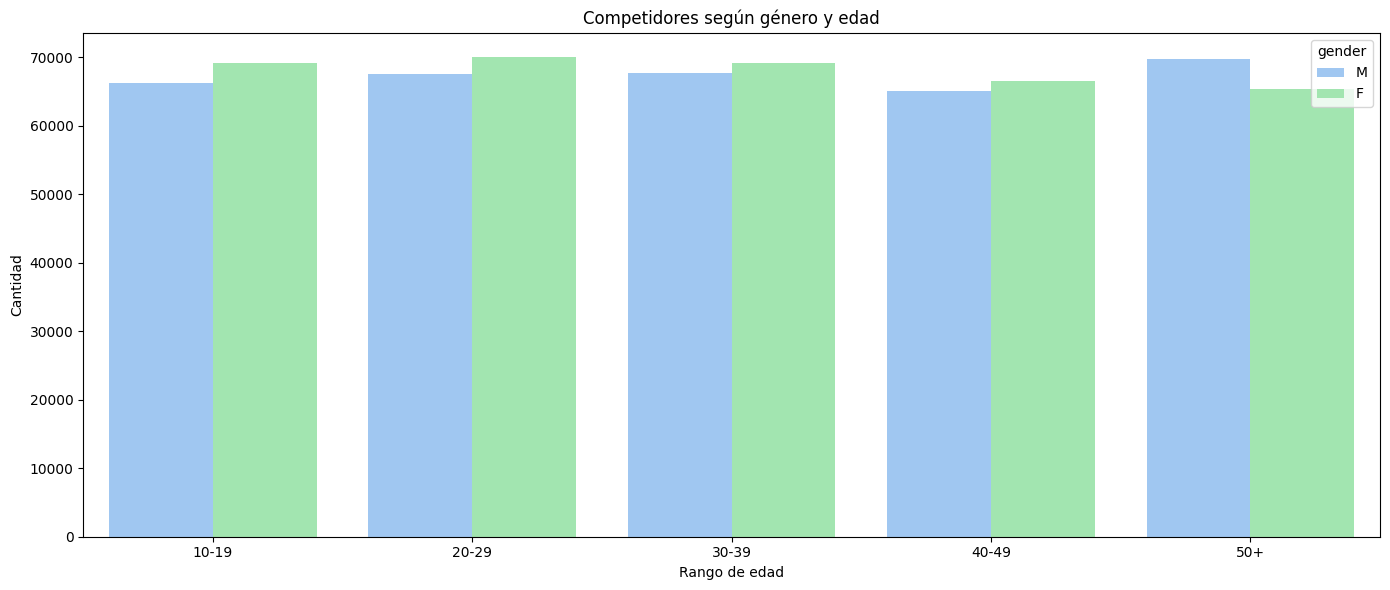

In [42]:
# Graficaremos competidores por edad y género

# Unimos DF

datos = pd.merge(df_person, df_games_competitor, how='inner', left_on= 'id', right_on='person_id')

#barplot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='age_group', y='person_id', data=datos, hue='gender', errorbar=None)

plt.title('Competidores según género y edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad')

ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()